# Data Analysis On The Movie DataBase
> ## Table of Content
> [Introduction](#Introduction)<br>
> [Data Wrangling](#Data-Wrangling)<br>
> [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
> [Conclusion and Limitations](#Conclusion)

## Introduction
> This is a detailed analysis of a tmdb dataset of over 10,000 movies over a period of 1960 to 2015. Details of the movies were given including their popularity, revenue, budgets, the movie genres etc.<br>
> Research Questions were drawn and the dataset was wrangled and explored to answer the Questions to a good depth. Analysis were made and datas were also further cleaned for easy exploratory analysis

### Research Questions
> **A few questions we would be answering in this analysis**
> 1. Do movies get more popularity with time and which decade enjoyed high amount of popularity<br>
> 2. Which Genre of music made more profit in the 21st century<br>
> 3. Movie with the highest and lowest profit in the 21st century<br>
> 4. Do Movies with higher runtime enjoy more popularity<br>
> 5. Is there any correlation between runtime and profit<br>
> 6. What is the relationship between profit and revenue

In [91]:
#Loading the Dataset and importing libraries for the project and checking out for the first five rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling
> In the section, we will be assessing and cleaning our data, we will fine-tune it to answer our Questions<br><br>
**Observations in the data**<br>
> 1. There are so many columns that is not needed for what we are trying to analyse<br>
> 2. Most of the movies have more than one genre but we will be making use of the first genre
**What we will be needed to be done**<br>
> 1. Missing Datas would be carefully looked into and dropped with their rows or columns as at when necessary.<br>
> 2. Columns like tagline, keywords, production_companies, overview, vote_count, vote_average would be dropped as they were not necessary for answering our research questions<br>
> 3. Duplicate Datas would also dropped.<br>
> 4. A *decades* column was created to categorize the released_year to their respective decades

In [92]:
#Finding out the number of rows and columns in the Dataset
movies.shape

(10866, 21)

In [93]:
# A brief information of the column's properties

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [94]:
# Check columns with misssing data and see if we should discard the ones
# we would not be needing or fill the ones that will help our analysis
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [95]:
# Filling the homepage column with None if it has a missing value and confirm
movies.homepage = movies.homepage.fillna("none")
movies.homepage.isna().sum()

0

In [96]:
# Dropping colums with too may missing values and some that does not help with the questions we are trying to answer
movies = movies.drop(['tagline', 'keywords', 'production_companies', 'overview', 'vote_count', 'vote_average'], axis=1)
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [97]:
# Further dropping the revenue_adj and budget_adj columns as their values aren't precise.
movies = movies.drop(['revenue_adj', 'budget_adj'], axis=1)
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [98]:
# Number of missing columns on each column
movies.isna().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
homepage           0
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [99]:
# Dropping rows of missing values
movies.dropna(axis=0, inplace=True)

In [100]:
# onfirming all missing values have been dropped
movies.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
homepage          0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [101]:
# Checking out the columns and rows we have now
movies.shape

(10727, 13)

In [102]:
# Checking the data types of our columns
movies.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
homepage           object
director           object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [103]:
# Changing our date to a datetime datatype as it is easier to work with and confirming it
movies.release_date = movies.release_date.astype('datetime64[s]')
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
homepage                  object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [104]:
# Converting budget and revenue to float as it is in a currency value
movies.budget = movies.budget.astype(float)
movies.revenue = movies.revenue.astype(float)
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
homepage                  object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [105]:
# Checking for duplicate datas
movies.duplicated().sum()

1

In [106]:
#dropping duplicate datas and confirming with shape
movies.drop_duplicates(inplace=True)

In [107]:
# Confirming if we still have duplicates
movies.duplicated().sum()

0

In [108]:
# Further confirming with shape
movies.shape

(10726, 13)

In [109]:
#Checking out what our dataFrame looks like
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


In [110]:
movies_new = movies[movies['cast'].str.contains('|')]
movies_new.shape

(10726, 13)

In [111]:
movies_new['genres'] = movies_new['genres'].apply(lambda x: x.split("|")[0])
movies_new.shape

(10726, 13)

In [112]:
movies_new.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,2015-06-09,2015
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action,2015-05-13,2015
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015


In [113]:
# Checking counts for each release_year so as to group them effectively
movies_new.release_year.value_counts()

2014    682
2013    648
2015    617
2012    574
2011    532
2009    523
2008    486
2010    475
2007    430
2006    404
2005    361
2004    307
2003    281
2002    264
2001    241
2000    224
1999    224
1998    210
1996    203
1997    191
1994    184
1993    177
1995    174
1988    142
1989    135
1991    133
1990    132
1992    132
1987    124
1986    120
1985    108
1984    104
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     56
1973     55
1971     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1972     40
1967     38
1968     38
1965     35
1963     34
1960     32
1962     32
1961     31
1969     30
Name: release_year, dtype: int64

### Categorizing years
**Sixties: 1960 - 1969**<br>
**Seventies: 1970 - 1979**<br>
**Eighties: 1980 - 1989**<br>
**Nineties: 1990 - 1999**<br>
**Noughties: 2000 - 2009**<br>
**twenty-tens: 2010 - 2019**

In [114]:
# Creating a new column (decades) and grouping release_year to them
year_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019]
year_labels = ['Sixties', 'Seventies', 'Eighties', 'Nineties', 'Noughties', 'Twenty-tens']

movies_new['decades'] = pd.cut(movies_new['release_year'], year_edges, labels=year_labels)

In [115]:
movies_new.decades.value_counts()

Twenty-tens    3528
Noughties      3521
Nineties       1760
Eighties       1054
Seventies       505
Sixties         358
Name: decades, dtype: int64

In [116]:
# Confirming if all our release year value has been categorized 
movies_new.decades.value_counts().sum() == movies_new.release_year.value_counts().sum()

True

In [117]:
movies_new.to_csv('tmdb-movies_clean.csv', index = False)

## Exploratory Data Analysis
> We will analyse the cleaned data and create visualizations with matplotlib that will address the research questions that were listed in our Research Questions section

In [118]:
#Loading the clean Dataset and importing libraries so there is no need loading each cell from the top

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_movies = pd.read_csv('tmdb-movies_clean.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,decades
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,2015-06-09,2015,Twenty-tens
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action,2015-05-13,2015,Twenty-tens
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015,Twenty-tens
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action,2015-12-15,2015,Twenty-tens
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action,2015-04-01,2015,Twenty-tens


## 1. Do movies get more popularity with time and which decade enjoyed high amount of popularity

In [119]:
pop_mean = df_movies.groupby('decades')['popularity'].mean()
pop_mean

decades
Eighties       0.526730
Nineties       0.621971
Noughties      0.637191
Seventies      0.486451
Sixties        0.428118
Twenty-tens    0.767968
Name: popularity, dtype: float64

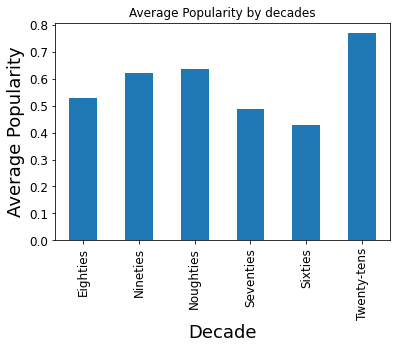

In [120]:
# Create a bar chart with proper labels

pop_mean.plot(kind='bar', title='Average Popularity by decades', fontsize= 12);
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Average Popularity', fontsize=18);

> **Do movies get more popular with time?**<br><br>
> It is clear from the analysis that latest movies enjoy more popularity<br><br>
> Movies in the twenty-tens (2010 - 2019) enjoyed high popularity<br><br>
> Movies in the sixties (1960 - 1969) endured less popularity

## 2. Which Genre of music made more profit in the 21st century

In [121]:
# A dataframe of movies realeased in the 21st century
millenium_movies = df_movies.query('release_year >= 2000')
millenium_movies.shape[0]

7049

In [122]:
# Dropping budget and revenue columns that have a zero amount
columns = ['budget', 'revenue']
millenium_movies[columns] = millenium_movies[columns].replace(0, np.NaN)
millenium_movies.dropna(subset = columns, inplace = True)
millenium_movies.shape

C:\Users\Crowtech\AppData\Local\Temp\ipykernel_8868\44646790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millenium_movies[columns] = millenium_movies[columns].replace(0, np.NaN)
C:\Users\Crowtech\AppData\Local\Temp\ipykernel_8868\44646790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millenium_movies.dropna(subset = columns, inplace = True)


(2496, 14)

In [123]:
millenium_movies.shape

(2496, 14)

> **We have to do some wrangling here by creating a profit column for our willenium data to address our questions**

In [124]:
millenium_movies['profits'] = millenium_movies.revenue - millenium_movies.budget
millenium_movies.head()

C:\Users\Crowtech\AppData\Local\Temp\ipykernel_8868\2749394118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millenium_movies['profits'] = millenium_movies.revenue - millenium_movies.budget


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,decades,profits
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,2015-06-09,2015,Twenty-tens,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action,2015-05-13,2015,Twenty-tens,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015,Twenty-tens,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action,2015-12-15,2015,Twenty-tens,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action,2015-04-01,2015,Twenty-tens,1.316249e+09


In [125]:
df_genre_profit = millenium_movies.groupby('genres')['profits'].mean()
df_genre_profit

genres
Action             1.034685e+08
Adventure          1.906027e+08
Animation          2.177913e+08
Comedy             5.410392e+07
Crime              3.711114e+07
Documentary        1.932375e+07
Drama              3.631277e+07
Family             1.633425e+08
Fantasy            1.252653e+08
History            7.717734e+07
Horror             4.784372e+07
Music              4.796266e+07
Mystery            2.983893e+07
Romance            6.020611e+07
Science Fiction    1.585939e+08
Thriller           4.723373e+07
War                1.005404e+08
Western            3.473339e+07
Name: profits, dtype: float64

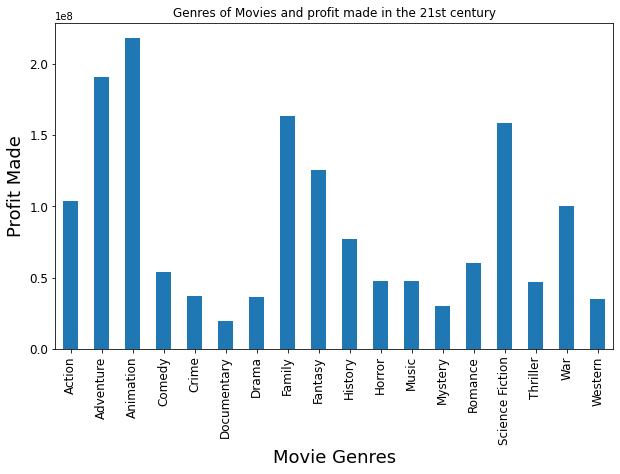

In [126]:
# Create a bar chart with proper labels

df_genre_profit.plot(kind='bar', title='Genres of Movies and profit made in the 21st century',figsize=(10, 6), fontsize= 12);
plt.xlabel('Movie Genres', fontsize=18)
plt.ylabel('Profit Made', fontsize=18);

> **Which Genre of movies had more profit in the 21st century?**<br><br>
> **Animations** movies made the highest amount of profit<br><br>
> **Documentary** movies made the lowest amount of profit

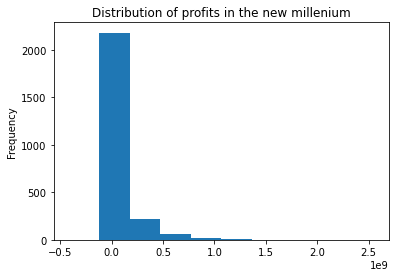

In [127]:
# Distribution of profits in the new millenium
plt.title("Distribution of profits in the new millenium")
millenium_movies['profits'].plot(kind ='hist');

**Distribution of profits in the new millenium**<br>
> The profit distribution is skewed to the right showing a positive skew-distribution

## 3. Movie with the highest and lowest profit in the 21st century

In [128]:
# Movie with the highest profit in the 21st century
millenium_movies.loc[millenium_movies['profits'].idxmax()]

id                                                            19995
imdb_id                                                   tt0499549
popularity                                                 9.432768
budget                                                  237000000.0
revenue                                                2781505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                http://www.avatarmovie.com/
director                                              James Cameron
runtime                                                         162
genres                                                       Action
release_date                                             2009-12-10
release_year                                                   2009
decades                                                   Noughties
profits                                         

In [129]:
# Movie with the lowest profit in the 21st century
millenium_movies.loc[millenium_movies['profits'].idxmin()]

id                                                            46528
imdb_id                                                   tt1032751
popularity                                                  0.25054
budget                                                  425000000.0
revenue                                                  11087569.0
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                     http://www.iamrogue.com/thewarriorsway
director                                                 Sngmoo Lee
runtime                                                         100
genres                                                    Adventure
release_date                                             2010-12-02
release_year                                                   2010
decades                                                 Twenty-tens
profits                                         

> **Movies with the highest and lowest profit in the 21st century?**<br><br>
> **Avatar** made the highest amount of profit with **\$2,544,505,847**<br><br>
> **The Warrior's Way** made the lowest amount of profit with **-\$413,912,431**
> 

## 4. Do Movies with higher runtime enjoy more popularity

In [130]:
# Checking for the median runtime
runtime_median = df_movies['runtime'].median()
runtime_median

99.0

In [131]:
# Check for movies with higher runtime(above median)
high_runtime = df_movies.query(f'runtime >= {runtime_median}')
high_runtime.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,decades
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,2015-06-09,2015,Twenty-tens
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action,2015-05-13,2015,Twenty-tens
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015,Twenty-tens


In [132]:
# Check for movies with lower runtime(above median)
low_runtime = df_movies.query(f'runtime < {runtime_median}')
low_runtime.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,decades
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,91,Family,2015-06-17,2015,Twenty-tens
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,94,Comedy,2015-06-09,2015,Twenty-tens
37,105864,tt1979388,3.339135,175000000.0,3.319261e+08,The Good Dinosaur,Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...,http://movies.disney.com/the-good-dinosaur,Peter Sohn,93,Adventure,2015-11-14,2015,Twenty-tens


In [133]:
# Confirming if all our datas are grouped into low and high runtime
df_movies.count() == low_runtime.count() + high_runtime.count()

id                True
imdb_id           True
popularity        True
budget            True
revenue           True
original_title    True
cast              True
homepage          True
director          True
runtime           True
genres            True
release_date      True
release_year      True
decades           True
dtype: bool

In [134]:
pop_low_runtime = low_runtime['popularity'].mean()
pop_high_runtime = high_runtime['popularity'].mean()
pop_low_runtime, pop_high_runtime

(0.4766702072823801, 0.8230747157527966)

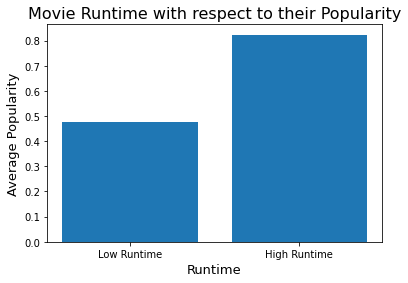

In [135]:
labels = ['Low Runtime', 'High Runtime']
height = [pop_low_runtime, pop_high_runtime]
plt.bar(labels, height)
plt.title("Movie Runtime with respect to their Popularity", fontsize=16)
plt.xlabel("Runtime", fontsize=13)
plt.ylabel("Average Popularity", fontsize=13);

> **Do movies with higher runtime enjoy more popularity**<br><br>
> Yes, the analysis showed that movies with higher runtime had higher popularity

## 5. Is there any correlation between runtime and profit

In [136]:
# Dropping budget and revenue columns that have a zero amount
columns = ['budget', 'revenue']
df_movies[columns] = df_movies[columns].replace(0, np.NaN)
df_movies.dropna(subset = columns, inplace = True)
df_movies.shape

(3849, 14)

In [137]:
# Creating a profit column for the cleaned movies
df_movies['profits'] = df_movies['revenue'] - df_movies['budget']

In [138]:
# hecking our dataframe to see our profits column
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,release_date,release_year,decades,profits
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,2015-06-09,2015,Twenty-tens,1.363529e+09


In [144]:
#function that defines scatterplot for relationships between two items
def scatterplot(size, x, y, alpha_val, title, x_label, y_label):
    plt.figure(figsize=size)
    plt.scatter(x, y, alpha=alpha_val)
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show();

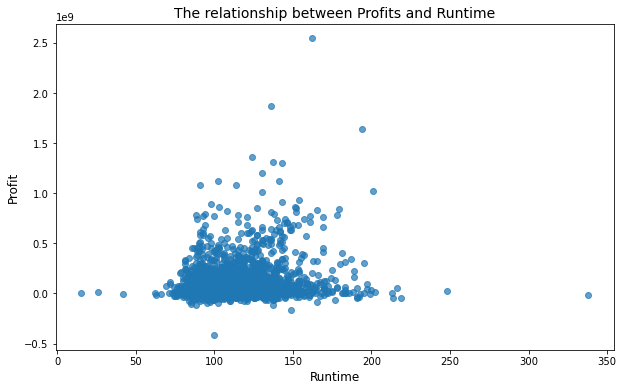

In [147]:
# Scatter plots to show the relationship between Runtime and Profits
scatterplot((10,6), df_movies.runtime, df_movies.profits, 0.7, "The relationship between Profits and Runtime", "Runtime", "Profit")

> Most of the movies have runtime in range of 80 to 130 Minutes.

In [150]:
#Percentage of movies that made losses
df_movies_losses = df_movies.query('profits < 0')
loss = df_movies_losses.value_counts().sum()
total = df_movies.value_counts().sum()
percentage_of_loss = (loss/total) * 100
round(percentage_of_loss)

28

> **28% of movies in the dataset made losses**

## 6. What is the relationship between profit and revenue

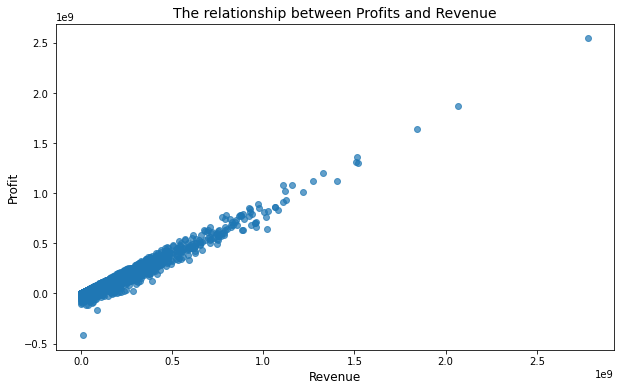

In [149]:
# Scatter plots to show the relationship between Profits and Revenue
scatterplot((10,6), df_movies.revenue, df_movies.profits, 0.7, "The relationship between Profits and Revenue", "Revenue", "Profit")

> **The relationship between profit and the revenue**<br><br>
The analysis showed that the higher revenue, the higher the profits 

## Conclusion

**The conclusion drawn after wrangling and exploratory analysis are as follows:**<br>
> 1. Movies released in recent times have a higher average popularity, the recent a movie is, the higher the average popularity<br>
> 2. Animation movies have been found to be more lucrative in the 21st century (year 2000 and beyond)<br>
> 3. Avatar made the highest profit in the 21st century and The warrior's way made the lowest profit<br>
> 4. Our analysis showed some movies made losses as the revenue was lesser than the budget<br>
> 5. Movies with higher runtime enjoyed high popularity when compared to movies with lower runtime<br>
> 6. There is a strong correlation in movies with runtime ranging from 80 minutes to 130 minutes<br>
> 7. There is a positive correlation between revenue and profit, movies with higher revenue tends to make more profits.

## Limitations

**This conclusion is not void of limitations and the limitations are as follows:**<br>
> 1. We have some details that were missing which reduced our sample size
> 2. Budgets and revenues of some movies were zero which is almost impossible realistically and dropping them reduced our sample size
> 3. This conclusion is not totally void of error